#                          <center> <div color = "blue">INTELLIGENCE ARTIFICIELLE</div> <br /><br /> PROJET IA for HumanForYou
</center>        





###                             <center> CESICDP GROUPE 2 </center>

#####  <center> Adrian SALAUM <br /><br /> Coralistone METSA<br /><br /> Romain COTTINEAU  <br /><br />Simon BRIFFAUD <br /><br /> </center>


##### ########################################################################################################################

##### ########################################################################################################################

##                     <center> <br />  I. RAPPEL DU CONTEXTE </center>                                                     

L'entreprise de produits pharmaceutiques HumanForYou basée en Inde emploie environ 4000 personnes. Cependant, chaque année elle subit un turn-over d'environ 15% de ses employés nécessitant de retrouver des profils similaires sur le marché de l'emploi.

La direction trouve que ce niveau de turn-over n'est pas bon pour l'entreprise car :

Les projets sur lesquels étaient les employés quittant la société prennent du retard ce qui nuit à la réputation de l'entreprise auprès de ses clients et partenaires.

Un service de ressources humaines de taille conséquente doit être conservé car il faut avoir les moyens de trouver les nouvelles recrues.

Du temps est perdu à l'arrivée des nouveaux employés car ils doivent très souvent être formés et ont besoin de temps pour devenir pleinement opérationnels dans leur nouvel environnement.

Le direction fait donc appel à vous, spécialistes de l'analyse de données, pour déterminer les facteurs ayant le plus d'influence sur ce taux de turn-over et lui proposer des modèles afin d'avoir des pistes d'amélioration pour donner à leurs employés l'envie de rester.

Données fournies
Un certain nombre de données concernant les employés vous a donc été transmis par le service des ressources humaines.

Il s'agit de fichiers textes au format CSV.

Les données ont été anonymisées : un employé de l'entreprise sera représenté par le même EmployeeID dans l'ensemble des fichiers qui suivent.

##               <center>  <br /> <br /> II. Pre-traitement des données et analyse exploratoire </center>   

Voici quelques étapes à suivre pour pré-traiter les données pour une utilisation avec K-means :

1. Intégration des données : Intégrez les données des différentes sources en une seule source de données. Si vous travaillez avec des données provenant de plusieurs sources, vous devez les intégrer en une seule source de données. Cela vous permettra de traiter les données comme une seule entité et de les analyser plus facilement.

1. Nettoyer les données : Assurez-vous que vos données sont propres et ne contiennent pas de valeurs manquantes, de doublons ou d'autres anomalies. Si nécessaire, supprimez ou remplacez les données manquantes.

2. Normaliser les données : Normalisez les données en les mettant à l'échelle de sorte que chaque variable ait une plage de valeurs comparable. La normalisation peut être effectuée en utilisant la méthode de la moyenne et de l'écart type, la méthode de la plage ou la méthode de la normalisation de l'amplitude.

3. Réduire la dimensionnalité : Si vous travaillez avec des données à haute dimensionnalité, utilisez des techniques de réduction de dimensionnalité telles que l'analyse en composantes principales (PCA) pour réduire la dimensionnalité de vos données et faciliter leur analyse.

4. Identifier les valeurs aberrantes : Les valeurs aberrantes peuvent fausser les résultats de K-means, il est donc important de les identifier et de les traiter correctement. Les valeurs aberrantes peuvent être supprimées ou remplacées par des valeurs plus appropriées.

5. Sélectionner les caractéristiques : Si vous travaillez avec des données qui contiennent de nombreuses caractéristiques, il peut être judicieux de sélectionner les caractéristiques les plus pertinentes pour votre analyse.

En résumé, le pré-traitement des données pour K-means comprend le nettoyage des données, la normalisation des données, la réduction de la dimensionnalité, l'identification et le traitement des valeurs aberrantes et la sélection des caractéristiques. En effectuant ces étapes, vous pouvez améliorer la qualité de vos données et obtenir des résultats plus significatifs à l'aide de K-means.

##  <center>  <br /> <br /> 1. Data wrangling </center>
Puisque les données proviennent d'un fichier CSV, nous utiliserons la fonction read_csv de Pandas pour charger les données dans un DataFrame.

### Ca c'est avant de charger les données.

In [3]:
import os
import tarfile
from six.moves import urllib
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

DOWNLOAD_URLS = [
    "https://raw.githubusercontent.com/ArkaniosCesi/IA_project/main/employee_survey_data.csv",
    "https://raw.githubusercontent.com/ArkaniosCesi/IA_project/main/general_data.csv",
    "https://raw.githubusercontent.com/ArkaniosCesi/IA_project/main/in_time.csv",
    "https://raw.githubusercontent.com/ArkaniosCesi/IA_project/main/manager_survey_data.csv",
    "https://raw.githubusercontent.com/ArkaniosCesi/IA_project/main/out_time.csv"
]
HOUSING_PATH = os.path.join("datasets", "employees")

def load_project_data(download_urls=DOWNLOAD_URLS, housing_path=HOUSING_PATH):    
    dataframes = {}
    
    for url in DOWNLOAD_URLS:
        file_name = url.split('/')[-1].split('.')[0]
        df = pd.read_csv(url)
        if df.keys()[0] != "EmployeeID":
            df.rename({df.keys()[0]:"EmployeeID"}, axis='columns', errors="raise", inplace=True)
        df.set_index("EmployeeID", inplace=True)
        dataframes[file_name] = df
    
    return dataframes

On vérifie si les données sont correctement chargées

In [379]:
data = load_project_data()

In [406]:
general_df = pd.concat(data.values(), axis=1, keys=data.keys())
general_df.head()

employee_survey_data                                  \
           EnvironmentSatisfaction JobSatisfaction WorkLifeBalance   
EmployeeID                                                           
1                              3.0             4.0             2.0   
2                              3.0             2.0             4.0   
3                              2.0             2.0             1.0   
4                              4.0             4.0             3.0   
5                              4.0             1.0             3.0   

           general_data                                                       \
                    Age Attrition     BusinessTravel              Department   
EmployeeID                                                                     
1                    51        No      Travel_Rarely                   Sales   
2                    31       Yes  Travel_Frequently  Research & Development   
3                    32        No  Travel_Frequently  Research & Development   
4                    38        No         Non-Travel  Research & Development   
5                    32        No      Travel_Rarely  Research & Development   

                                                      ...  \
           DistanceFromHome Education EducationField  ...   
EmployeeID                                            ...   
1                         6         2  Life Sciences  ...   
2                        10         1  Life Sciences  ...   
3                        17         4          Other  ...   
4                         2         5  Life Sciences  ...   
5                        10         1        Medical  ...   

                       out_time                                            \
                     2015-12-18           2015-12-21           2015-12-22   
EmployeeID                                                                  
1                           NaN  2015-12-21 17:15:50  2015-12-22 17:27:51   
2           2015-12-18 18:31:28  2015-12-21 17:34:16  2015-12-22 18:16:35   
3           2015-12-18 17:02:23  2015-12-21 17:20:17  2015-12-22 16:32:50   
4           2015-12-18 17:55:23  2015-12-21 16:49:09  2015-12-22 17:24:00   
5           2015-12-18 17:52:48  2015-12-21 17:43:35  2015-12-22 18:07:57   

                                                                 \
                     2015-12-23           2015-12-24 2015-12-25   
EmployeeID                                                        
1           2015-12-23 16:44:44  2015-12-24 17:47:22        NaN   
2           2015-12-23 17:38:18                  NaN        NaN   
3           2015-12-23 16:59:43  2015-12-24 16:58:25        NaN   
4           2015-12-23 17:36:35  2015-12-24 16:48:21        NaN   
5           2015-12-23 18:00:49  2015-12-24 17:59:22        NaN   

                                                                           \
                     2015-12-28           2015-12-29           2015-12-30   
EmployeeID                                                                  
1           2015-12-28 18:00:07  2015-12-29 17:22:30  2015-12-30 17:40:56   
2           2015-12-28 17:08:38  2015-12-29 17:54:46  2015-12-30 18:31:35   
3           2015-12-28 16:43:31  2015-12-29 17:09:56  2015-12-30 17:06:25   
4           2015-12-28 17:19:34  2015-12-29 16:58:16  2015-12-30 17:40:11   
5           2015-12-28 17:44:59  2015-12-29 18:47:00  2015-12-30 17:15:33   

                                 
                     2015-12-31  
EmployeeID                       
1           2015-12-31 17:17:33  
2           2015-12-31 17:40:58  
3           2015-12-31 17:15:50  
4           2015-12-31 17:09:14  
5           2015-12-31 17:42:14  

[5 rows x 550 columns]

On affiche la description des colonnes pour chaque jeu de données

In [383]:
general_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 1 to 4410
Columns: 550 entries, ('employee_survey_data', 'EnvironmentSatisfaction') to ('out_time', '2015-12-31')
dtypes: float64(29), int64(15), object(506)
memory usage: 18.5+ MB


In [384]:
general_df.describe()

employee_survey_data                                 general_data  \
      EnvironmentSatisfaction JobSatisfaction WorkLifeBalance          Age   
count             4385.000000     4390.000000     4372.000000  4410.000000   
mean                 2.723603        2.728246        2.761436    36.923810   
std                  1.092756        1.101253        0.706245     9.133301   
min                  1.000000        1.000000        1.000000    18.000000   
25%                  2.000000        2.000000        2.000000    30.000000   
50%                  3.000000        3.000000        3.000000    36.000000   
75%                  4.000000        4.000000        3.000000    43.000000   
max                  4.000000        4.000000        4.000000    60.000000   

                                                                               \
      DistanceFromHome    Education EmployeeCount     JobLevel  MonthlyIncome   
count      4410.000000  4410.000000        4410.0  4410.000000    4410.000000   
mean          9.192517     2.912925           1.0     2.063946   65029.312925   
std           8.105026     1.023933           0.0     1.106689   47068.888559   
min           1.000000     1.000000           1.0     1.000000   10090.000000   
25%           2.000000     2.000000           1.0     1.000000   29110.000000   
50%           7.000000     3.000000           1.0     2.000000   49190.000000   
75%          14.000000     4.000000           1.0     3.000000   83800.000000   
max          29.000000     5.000000           1.0     5.000000  199990.000000   

                          ...   out_time                                   \
      NumCompaniesWorked  ... 2015-01-26 2015-03-05 2015-05-01 2015-07-17   
count        4391.000000  ...        0.0        0.0        0.0        0.0   
mean            2.694830  ...        NaN        NaN        NaN        NaN   
std             2.498887  ...        NaN        NaN        NaN        NaN   
min             0.000000  ...        NaN        NaN        NaN        NaN   
25%             1.000000  ...        NaN        NaN        NaN        NaN   
50%             2.000000  ...        NaN        NaN        NaN        NaN   
75%             4.000000  ...        NaN        NaN        NaN        NaN   
max             9.000000  ...        NaN        NaN        NaN        NaN   

                                                                         
      2015-09-17 2015-10-02 2015-11-09 2015-11-10 2015-11-11 2015-12-25  
count        0.0        0.0        0.0        0.0        0.0        0.0  
mean         NaN        NaN        NaN        NaN        NaN        NaN  
std          NaN        NaN        NaN        NaN        NaN        NaN  
min          NaN        NaN        NaN        NaN        NaN        NaN  
25%          NaN        NaN        NaN        NaN        NaN        NaN  
50%          NaN        NaN        NaN        NaN        NaN        NaN  
75%          NaN        NaN        NaN        NaN        NaN        NaN  
max          NaN        NaN        NaN        NaN        NaN        NaN  

[8 rows x 44 columns]

On visualise les données

In [237]:
# for df_name in data.keys():
#     data[df_name].hist(bins=50, figsize=(20,15))
# plt.show()

#### On encode les colonnes non-numériques

In [411]:
from sklearn.preprocessing import OrdinalEncoder
from pandas.api.types import is_numeric_dtype

def encodeNonNumericColumns(df, table_name):
    table = data[table_name]
    fields_encoded = {}

    for column in table.columns:
        if not is_numeric_dtype(table[column]):
            field = table[[column]]
            ordinal_encoder = OrdinalEncoder()
            field_encoded = ordinal_encoder.fit_transform(field)
            fields_encoded[column] = field_encoded

    for key in fields_encoded.keys():
        df.loc[:, (table_name, key)] = fields_encoded[key]

In [391]:
def fillEmptyValues(df, table_name):
    table = df[table_name]
    for column in table.columns:
        if not is_numeric_dtype(table[column]):
            median = 0.0
        else:
            median = table[column].median()
        df.loc[:, (table_name, column)].fillna(median, inplace=True)

In [392]:
def checkIfTableIsFull(df, table_name):
    table = df[table_name]
    res = True
    for column in table.columns:
        if df.loc[:, (table_name, column)].isnull().any():
            res = False
    print(res)

In [385]:
df_non_ethical = general_df.copy()

In [412]:
encodeNonNumericColumns(df_non_ethical, "general_data")

fillEmptyValues(df_non_ethical, "general_data")
fillEmptyValues(df_non_ethical, "employee_survey_data")
fillEmptyValues(df_non_ethical, "manager_survey_data")

In [398]:
df_non_ethical.head()

employee_survey_data                                  \
           EnvironmentSatisfaction JobSatisfaction WorkLifeBalance   
EmployeeID                                                           
1                              3.0             4.0             2.0   
2                              3.0             2.0             4.0   
3                              2.0             2.0             1.0   
4                              4.0             4.0             3.0   
5                              4.0             1.0             3.0   

           general_data                                                       \
                    Age Attrition BusinessTravel Department DistanceFromHome   
EmployeeID                                                                     
1                    51       0.0            2.0        2.0                6   
2                    31       1.0            1.0        1.0               10   
3                    32       0.0            1.0        1.0               17   
4                    38       0.0            0.0        1.0                2   
5                    32       0.0            2.0        1.0               10   

                                     ...             out_time  \
           Education EducationField  ...           2015-12-18   
EmployeeID                           ...                        
1                  2            1.0  ...                  NaN   
2                  1            1.0  ...  2015-12-18 18:31:28   
3                  4            4.0  ...  2015-12-18 17:02:23   
4                  5            1.0  ...  2015-12-18 17:55:23   
5                  1            3.0  ...  2015-12-18 17:52:48   

                                                                           \
                     2015-12-21           2015-12-22           2015-12-23   
EmployeeID                                                                  
1           2015-12-21 17:15:50  2015-12-22 17:27:51  2015-12-23 16:44:44   
2           2015-12-21 17:34:16  2015-12-22 18:16:35  2015-12-23 17:38:18   
3           2015-12-21 17:20:17  2015-12-22 16:32:50  2015-12-23 16:59:43   
4           2015-12-21 16:49:09  2015-12-22 17:24:00  2015-12-23 17:36:35   
5           2015-12-21 17:43:35  2015-12-22 18:07:57  2015-12-23 18:00:49   

                                                                 \
                     2015-12-24 2015-12-25           2015-12-28   
EmployeeID                                                        
1           2015-12-24 17:47:22        NaN  2015-12-28 18:00:07   
2                           NaN        NaN  2015-12-28 17:08:38   
3           2015-12-24 16:58:25        NaN  2015-12-28 16:43:31   
4           2015-12-24 16:48:21        NaN  2015-12-28 17:19:34   
5           2015-12-24 17:59:22        NaN  2015-12-28 17:44:59   

                                                                           
                     2015-12-29           2015-12-30           2015-12-31  
EmployeeID                                                                 
1           2015-12-29 17:22:30  2015-12-30 17:40:56  2015-12-31 17:17:33  
2           2015-12-29 17:54:46  2015-12-30 18:31:35  2015-12-31 17:40:58  
3           2015-12-29 17:09:56  2015-12-30 17:06:25  2015-12-31 17:15:50  
4           2015-12-29 16:58:16  2015-12-30 17:40:11  2015-12-31 17:09:14  
5           2015-12-29 18:47:00  2015-12-30 17:15:33  2015-12-31 17:42:14  

[5 rows x 550 columns]

#### On supprime des colonnes jugées inutiles pour créer un nouveau Dataframe plus éthique

In [413]:
def dropColumns(df, table_name, columns):
    for column in columns:
        df[table_name].drop(column, axis=1, inplace=True)

In [415]:
df_ethical = general_df.copy()

columns_to_drop = [
    "MaritalStatus",
    "Over18",
    "StandardHours",
    "StockOptionLevel",
    "TrainingTimesLastYear",
    "Gender"
]

dropColumns(df_ethical, "general_data", columns_to_drop)

df_non_ethical.head()

C:\Users\simon\AppData\Local\Temp\ipykernel_18480\2067806175.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[table_name].drop(column, axis=1, inplace=True)
C:\Users\simon\AppData\Local\Temp\ipykernel_18480\2067806175.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[table_name].drop(column, axis=1, inplace=True)
C:\Users\simon\AppData\Local\Temp\ipykernel_18480\2067806175.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

employee_survey_data                                  \
           EnvironmentSatisfaction JobSatisfaction WorkLifeBalance   
EmployeeID                                                           
1                              3.0             4.0             2.0   
2                              3.0             2.0             4.0   
3                              2.0             2.0             1.0   
4                              4.0             4.0             3.0   
5                              4.0             1.0             3.0   

           general_data                                                       \
                    Age Attrition BusinessTravel Department DistanceFromHome   
EmployeeID                                                                     
1                    51       0.0            2.0        2.0                6   
2                    31       1.0            1.0        1.0               10   
3                    32       0.0            1.0        1.0               17   
4                    38       0.0            0.0        1.0                2   
5                    32       0.0            2.0        1.0               10   

                                     ...             out_time  \
           Education EducationField  ...           2015-12-18   
EmployeeID                           ...                        
1                  2            1.0  ...                  NaN   
2                  1            1.0  ...  2015-12-18 18:31:28   
3                  4            4.0  ...  2015-12-18 17:02:23   
4                  5            1.0  ...  2015-12-18 17:55:23   
5                  1            3.0  ...  2015-12-18 17:52:48   

                                                                           \
                     2015-12-21           2015-12-22           2015-12-23   
EmployeeID                                                                  
1           2015-12-21 17:15:50  2015-12-22 17:27:51  2015-12-23 16:44:44   
2           2015-12-21 17:34:16  2015-12-22 18:16:35  2015-12-23 17:38:18   
3           2015-12-21 17:20:17  2015-12-22 16:32:50  2015-12-23 16:59:43   
4           2015-12-21 16:49:09  2015-12-22 17:24:00  2015-12-23 17:36:35   
5           2015-12-21 17:43:35  2015-12-22 18:07:57  2015-12-23 18:00:49   

                                                                 \
                     2015-12-24 2015-12-25           2015-12-28   
EmployeeID                                                        
1           2015-12-24 17:47:22        NaN  2015-12-28 18:00:07   
2                           NaN        NaN  2015-12-28 17:08:38   
3           2015-12-24 16:58:25        NaN  2015-12-28 16:43:31   
4           2015-12-24 16:48:21        NaN  2015-12-28 17:19:34   
5           2015-12-24 17:59:22        NaN  2015-12-28 17:44:59   

                                                                           
                     2015-12-29           2015-12-30           2015-12-31  
EmployeeID                                                                 
1           2015-12-29 17:22:30  2015-12-30 17:40:56  2015-12-31 17:17:33  
2           2015-12-29 17:54:46  2015-12-30 18:31:35  2015-12-31 17:40:58  
3           2015-12-29 17:09:56  2015-12-30 17:06:25  2015-12-31 17:15:50  
4           2015-12-29 16:58:16  2015-12-30 17:40:11  2015-12-31 17:09:14  
5           2015-12-29 18:47:00  2015-12-30 17:15:33  2015-12-31 17:42:14  

[5 rows x 550 columns]

In [17]:
for column in it_copy:
    it_copy[column].fillna(0.0, inplace=True)

for column in ot_copy:
    ot_copy[column].fillna(0.0, inplace=True)

#### On rajoute la colonne "Attrition" dans les 4 tables qui ne l'ont pas

In [ ]:
gd_copy.drop("MaritalStatus", axis=1, inplace=True)
gd_copy.drop("Over18", axis=1, inplace=True)
gd_copy.drop("StandardHours", axis=1, inplace=True)
gd_copy.drop("StockOptionLevel", axis=1, inplace=True)
gd_copy.drop("TrainingTimesLastYear", axis=1, inplace=True)
gd_copy.drop("Gender", axis=1, inplace=True)

gd_copy.head()


import numpy as np

for column in it_copy:
    if it_copy[column].isnull().sum() == 4410:
        it_copy.drop(column, axis=1, inplace=True)

for column in ot_copy:
    if ot_copy[column].isnull().sum() == 4410:
        ot_copy.drop(column, axis=1, inplace=True)

### Visualisation des données

In [204]:
X = transformed_tables[0].copy()
comparison_table = pd.DataFrame()

In [209]:
def createAttritionPerAttribute(table, table_from, attribute_name):
    unique_items = set(table_from[attribute_name])
    attrition_per_attribute = dict()
    column = table_from[attribute_name].tolist()
    
    for item in unique_items:
        attrition_per_attribute[item] = 0
    
    for item in unique_items:
        for i in range(len(column)):
            if column[i] == item:
                attrition_per_attribute[column[i]] += 1
    
    zzz = []
    
    for row in table_from[attribute_name]:
        zzz.append(attrition_per_attribute[row])
    
    table[f"AttritionPer{attribute_name}"] = zzz

In [211]:
attributes_to_compare = ["Age", "DistanceFromHome", "JobLevel", "JobRole", "MonthlyIncome", "YearsAtCompany"]

for attribute in attributes_to_compare:
    createAttritionPerAttribute(comparison_table, X, attribute)

print(X.head())
print(comparison_table.head())

            Age  Attrition  BusinessTravel  Department  DistanceFromHome  \
EmployeeID                                                                 
1            51        0.0             2.0         2.0                 6   
2            31        1.0             1.0         1.0                10   
3            32        0.0             1.0         1.0                17   
4            38        0.0             0.0         1.0                 2   
5            32        0.0             2.0         1.0                10   

            Education  EducationField  EmployeeCount  JobLevel  JobRole  \
EmployeeID                                                                
1                   2             1.0              1         1      0.0   
2                   1             1.0              1         1      6.0   
3                   4             4.0              1         4      7.0   
4                   5             1.0              1         3      1.0   
5                

In [227]:
def plotData(table, origin_table):
    for col_name in table:
        if "AttritionPer" in col_name:
            print(col_name)
            original_col_name = col_name.split('Per')[-1]

            if len(set(origin_table[original_col_name])) < 10:
                data = dict()
                for i in range(len(list(origin_table[original_col_name]))):
                    if list(origin_table[original_col_name])[i] not in data.keys():
                        data[list(origin_table[original_col_name])[i]] = list(table[col_name])[i]

                data = dict(sorted(data.items()))
                names = list(data.keys())
                values = list(data.values())
                plt.bar(range(len(data)), values, tick_label=names, width=0.8)
                plt.show()
            else:
                cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
                cluster.fit_predict(table)
                plt.figure(figsize=(10, 7))
                plt.scatter(origin_table[col_name.split('Per')[-1]],table[col_name], cmap='rainbow')
                plt.show()

AttritionPerAge


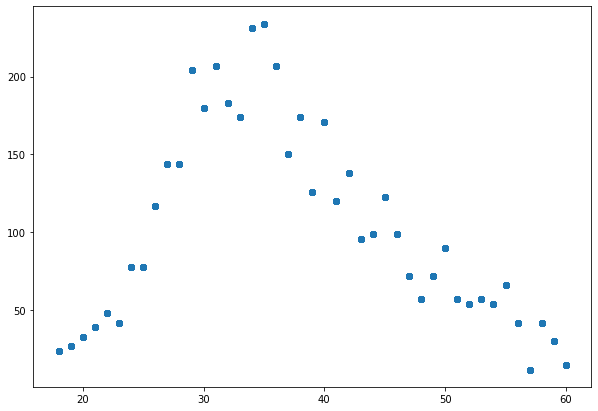

AttritionPerDistanceFromHome


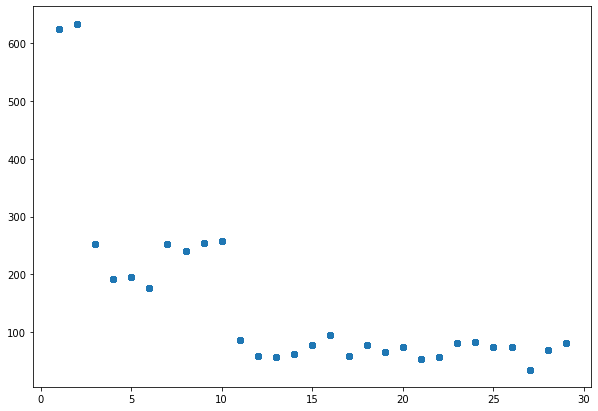

AttritionPerJobLevel


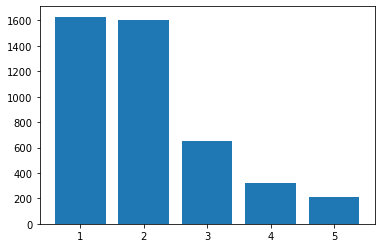

AttritionPerJobRole


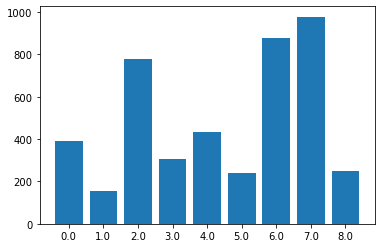

AttritionPerMonthlyIncome


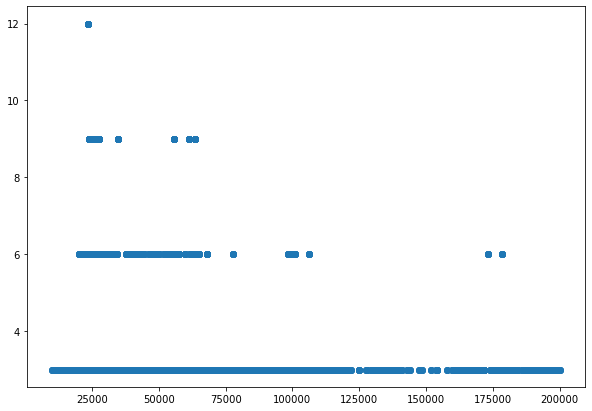

AttritionPerYearsAtCompany


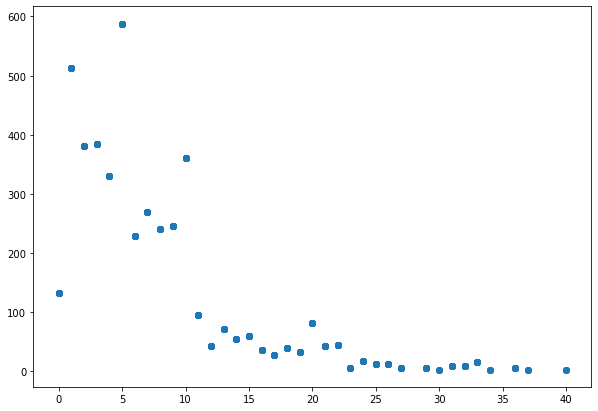

In [228]:
plotData(comparison_table, X)

##               <center>  <br /> <br />  2. Création du jeu de test </center>   

In [131]:
from numpy import random

def split_train_test(data, test_ratio):
    shuffled_indices = random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_sets, test_sets = [], []

for table in transformed_tables:
    train_set, test_set = split_train_test(table, 0.2)
    train_sets.append(train_set)
    test_set.append(test_set)
    print(len(train_set), "train +", len(test_set), "test")

C:\Users\simon\AppData\Local\Temp\ipykernel_18480\2412648725.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_set.append(test_set)
C:\Users\simon\AppData\Local\Temp\ipykernel_18480\2412648725.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_set.append(test_set)
C:\Users\simon\AppData\Local\Temp\ipykernel_18480\2412648725.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_set.append(test_set)
C:\Users\simon\AppData\Local\Temp\ipykernel_18480\2412648725.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_set.append(test_set)
C:\Users\simon\AppData\Local\Temp\ipykernel_18480\2412648725.py:15: FutureWarning: T

3528 train + 882 test
3528 train + 882 test
3528 train + 882 test
3528 train + 882 test
3528 train + 882 test


DF éthique et non éthique >> comparer après, discuter : est-ce qu'on obtient les mêmes rés avec les 2 ?

Normaliser les valeurs

-> proposer solutions pour répondre aux besoins du client : comment faire pour réduire les départs ? les augmenter ?

##  <center>  <br /> <br /> 3. Étude des données </center>

##  <center>  <br /> <br /> 4. Analyse des données </center>

## <center>  <br /> <br /> 5. Nettoyer les données </center>

##  <center>  <br /> <br /> III. Choix de (des) l'algorithme(s) d'"IA" retenu(s) </center>


## justification des choix et les traitements effectués pour faire face aux problématiques classiques 


## <center>  <br /> <br /> IV. Analyse des résultats obtenus et leur interprétation </center>

##  <center>  <br /> <br /> V. démarche mise en œuvre pour améliorer un modèle  </center>

### <center>  <br /> <br />  1. les différents modèles effectués . </center>

### <center>  <br /> <br />  1.1   K-means . </center>

### <center>  <br /> <br />  1.2  Validation croisée . </center>

### <center>  <br /> <br />  1.3  Les autres algorithmes qu'on va tester. </center>

### <center>  <br /> <br />  2. choix du modèle retenu au final parmi les différents essais effectués en justifiant pas rapport au besoin du client et des métriques. </center>



### <center>  <br /> <br /> les propositions finales justifiées </center>

## <center>  <br /> <br /> VI. RESSOURCES </center>  

## <center>  <br /> <br /> VIII. LEXIQUE </center>  